# Traffic Sign Classification (using CNN)

---

**Description**: This project focuses on the classification of Traffic Signs using deep learning technique: CNN.


**Details**: In this project, our primary objective is to develop highly accurate models for the classification of traffic signs on the road using the TensorFlow and Keras libraries. We have access to two critical datasets: one containing images of traffic signs and the other containing corresponding labels for these images.

During the training phase of our model, we've implemented a normalization process after each layer. This normalization step is crucial as it accelerates the learning process for our machine learning algorithm. Additionally, we have applied data augmentation techniques to prevent both overfitting and underfitting.

The overarching goal of this project is to provide valuable insights into traffic sign classification. The potential applications of such a model are diverse and impactful, especially in the context of autonomous vehicles. By integrating our model into these vehicles, we can enhance driver safety by alerting them to traffic signs, potentially saving them from penalties, and improving overall road safety.

Our contribution to this field has the potential to revolutionize the way we interact with traffic signs on the road, representing a significant step toward a safer and more efficient transportation system.







**Importing the librarires**

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Mounting the google drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/Traffic Sign'
!ls

/content/drive/MyDrive/Traffic Sign
cycle.png  horn.png  noEntry.jpg  TrafficSign.h5  TrafficSign.zip


In [6]:
!unzip TrafficSign.zip

Streaming output truncated to the last 5000 lines.
  inflating: traffic_Data/DATA/24/024_1_0040.png  
  inflating: traffic_Data/DATA/24/024_1_0041.png  
  inflating: traffic_Data/DATA/24/024_1_0042.png  
  inflating: traffic_Data/DATA/24/024_1_0043.png  
  inflating: traffic_Data/DATA/24/024_1_0044.png  
  inflating: traffic_Data/DATA/24/024_1_0045.png  
  inflating: traffic_Data/DATA/24/024_1_0046.png  
  inflating: traffic_Data/DATA/24/024_1_0047.png  
  inflating: traffic_Data/DATA/24/024_1_0048.png  
  inflating: traffic_Data/DATA/24/024_1_0049.png  
  inflating: traffic_Data/DATA/25/025_0001.png  
  inflating: traffic_Data/DATA/25/025_1_0001.png  
  inflating: traffic_Data/DATA/26/026_0001.png  
  inflating: traffic_Data/DATA/26/026_0002.png  
  inflating: traffic_Data/DATA/26/026_0003.png  
  inflating: traffic_Data/DATA/26/026_0004.png  
  inflating: traffic_Data/DATA/26/026_0005.png  
  inflating: traffic_Data/DATA/26/026_0006.png  
  inflating: traffic_Data/DATA/26/026_0007.pn

In [7]:
labels_path = '/content/drive/MyDrive/Traffic Sign/labels.csv'

In [8]:
df_labels = pd.read_csv(labels_path)
df_labels.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [9]:
images_path = '/content/drive/MyDrive/Traffic Sign/traffic_Data/DATA'

**Displaying the data**

In [10]:
data = []
entry = []
for filename in os.listdir(images_path):
  entry.append(df_labels['Name'][int(filename)])
  entry.append(int(filename))
  data.append(entry[:2])
  entry.clear()

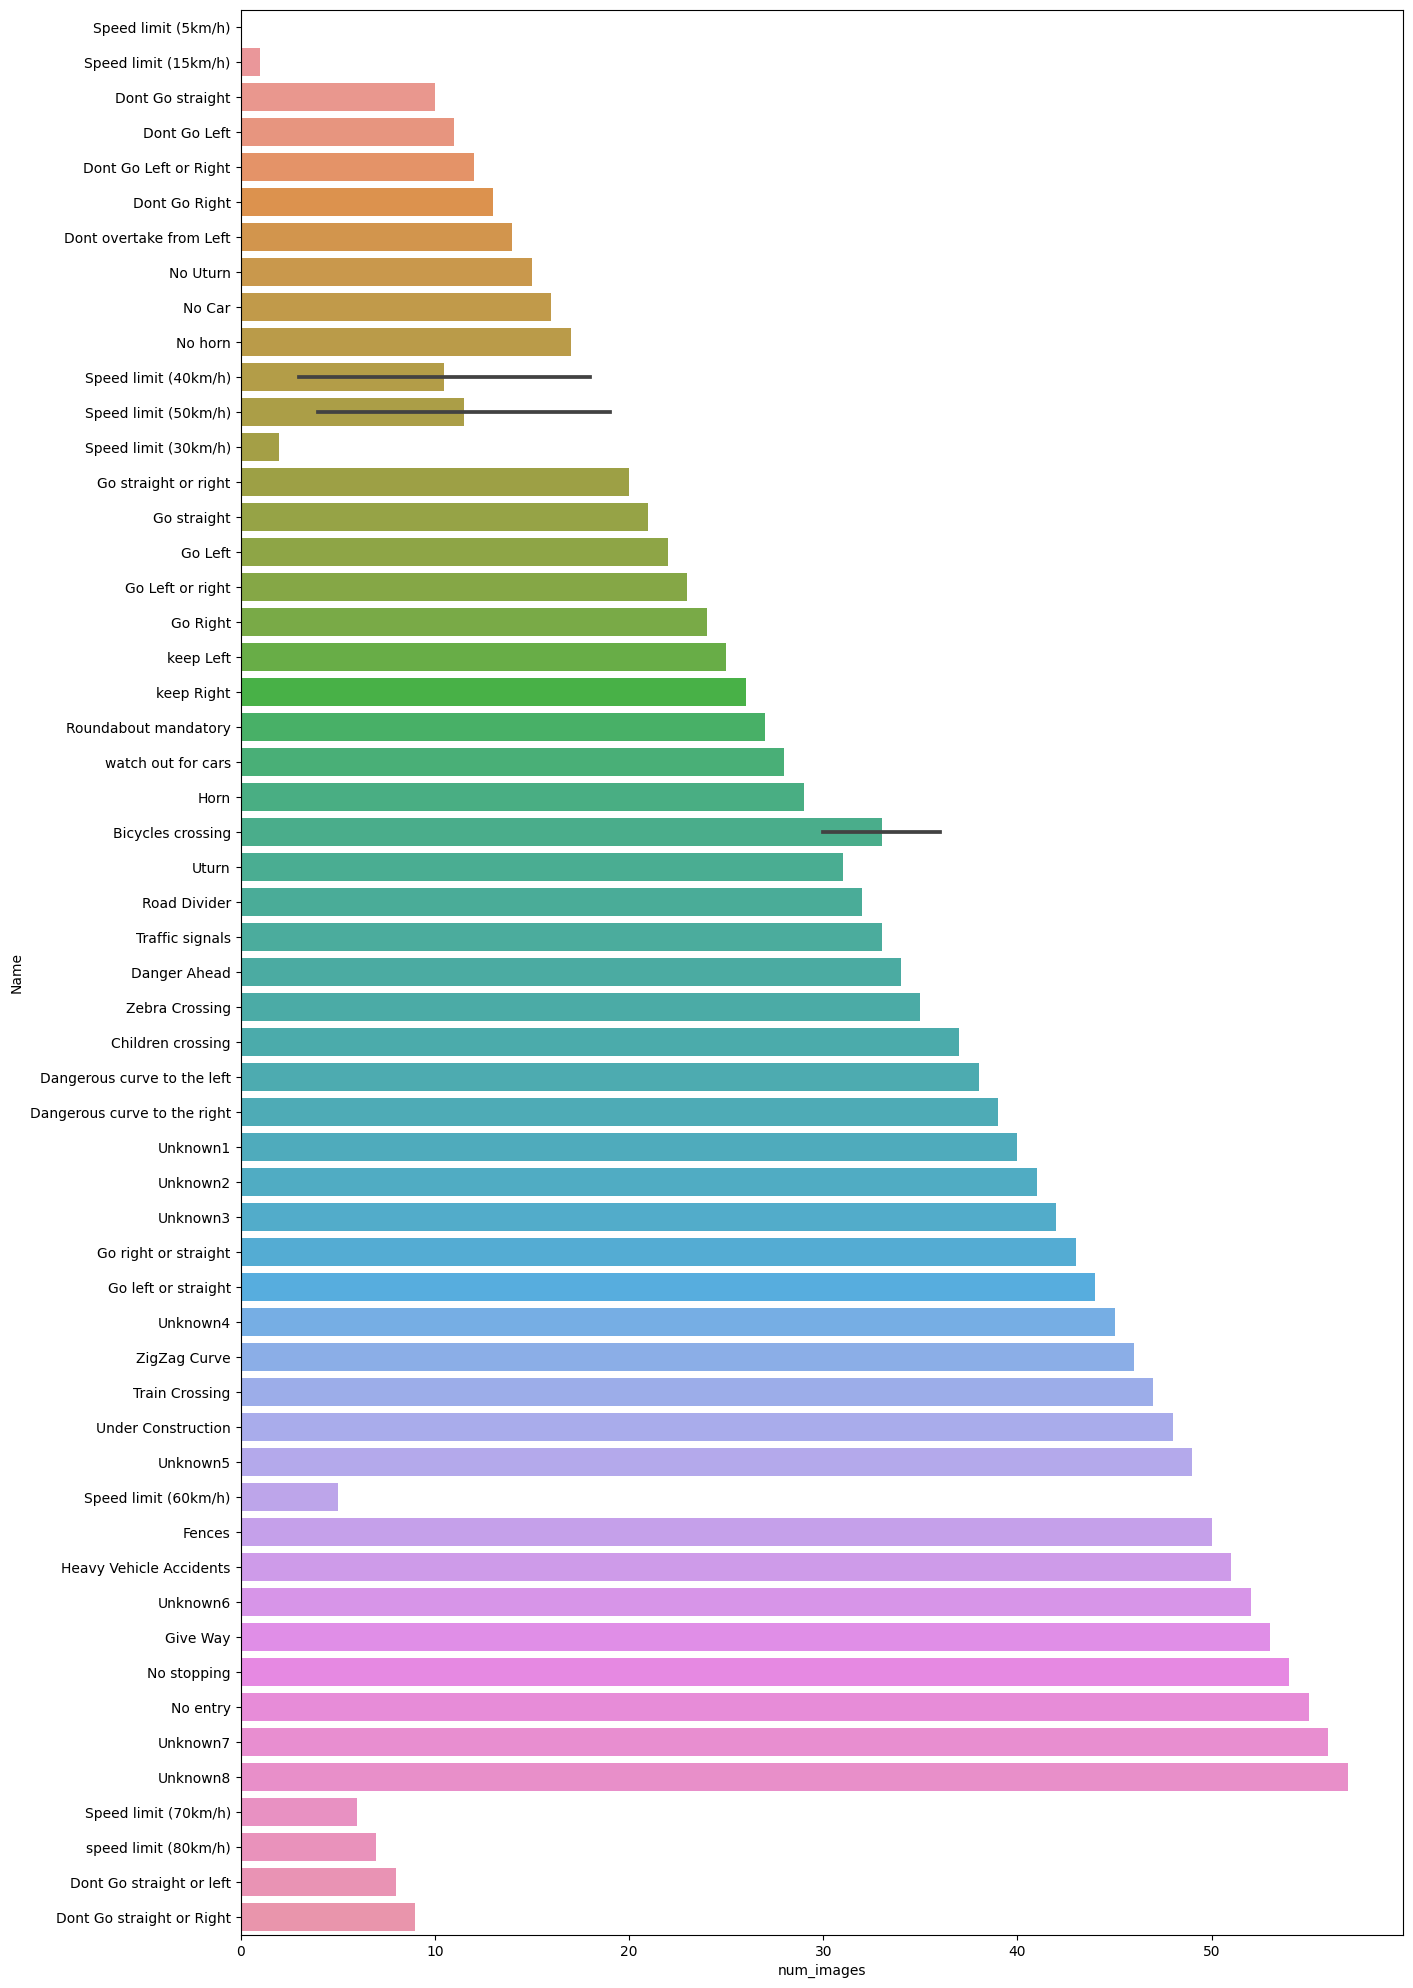

In [11]:
display_data = pd.DataFrame(data,columns=['Name' , 'num_images'])
plt.figure(figsize=(15,25))
ax = sns.barplot(x='num_images',y='Name' , data=display_data)

**Creating a Pipeline**

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(images_path,validation_split=0.3,
                                                    subset='training',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)


Found 4170 files belonging to 58 classes.
Using 2919 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(images_path,validation_split=0.25,
                                                    subset='validation',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)

Found 4170 files belonging to 58 classes.
Using 1042 files for validation.


In [14]:
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
  class_names.append(df_labels['Name'][int(i)])


**Attaching the images with their respective names**

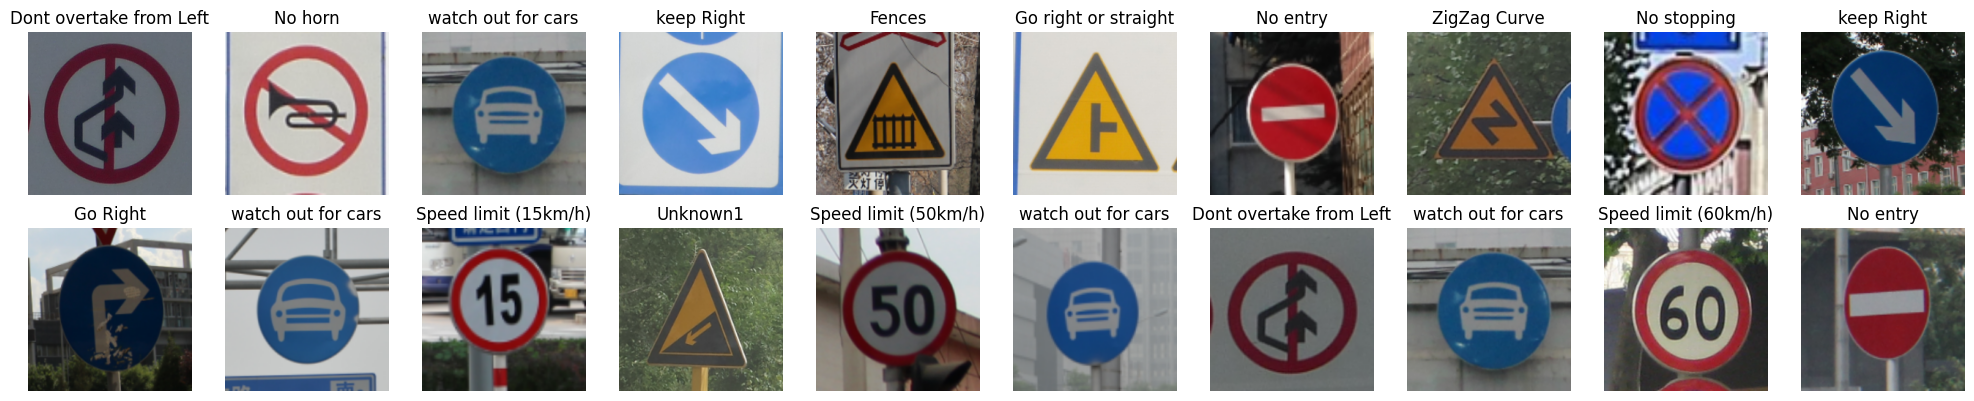

In [15]:
plt.figure(figsize=(25, 25))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

**Augmenting the data to prevent overfitting of the model**

In [16]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
   tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical")
  ]
)

In [17]:
from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
cnn = Sequential()
cnn.add(data_augmentation)
cnn.add(Rescaling(1./255))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128 ,(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(256, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128 , activation = 'relu',kernel_regularizer=l2(0.001)))
cnn.add(Dropout(0.25))
cnn.add(Dense(256 , activation = 'relu',kernel_regularizer=l2(0.001)))
cnn.add(Dense(len(df_labels) , activation = 'softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 222, 222, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)     

In [18]:
cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam' , metrics=['accuracy'])

In [19]:
# Set callback functions to early stop training
thiscallback = [EarlyStopping(monitor='val_loss', patience=5)]
final = cnn.fit(train_ds,validation_data=val_ds, epochs=50 , callbacks=thiscallback)

Epoch 1/50
92/92 [==============================] - 39s 207ms/step - loss: 2.7469 - accuracy: 0.3662 - val_loss: 4.3150 - val_accuracy: 0.0144
Epoch 2/50
92/92 [==============================] - 20s 208ms/step - loss: 1.8242 - accuracy: 0.5526 - val_loss: 4.5214 - val_accuracy: 0.0326
Epoch 3/50
92/92 [==============================] - 18s 190ms/step - loss: 1.4468 - accuracy: 0.6338 - val_loss: 4.0053 - val_accuracy: 0.0557
Epoch 4/50
92/92 [==============================] - 18s 192ms/step - loss: 1.1979 - accuracy: 0.7146 - val_loss: 3.1203 - val_accuracy: 0.2601
Epoch 5/50
92/92 [==============================] - 19s 203ms/step - loss: 1.0991 - accuracy: 0.7342 - val_loss: 1.7393 - val_accuracy: 0.5816
Epoch 6/50
92/92 [==============================] - 18s 190ms/step - loss: 1.0245 - accuracy: 0.7688 - val_loss: 0.9772 - val_accuracy: 0.7591
Epoch 7/50
92/92 [==============================] - 18s 192ms/step - loss: 0.8886 - accuracy: 0.8047 - val_loss: 0.7138 - val_accuracy: 0.8743

**Saving the model**

In [20]:
# cnn.save('TrafficSign.keras')
# import shutil

# source_path = '/content/drive/MyDrive/TrafficSign/TrafficSign.keras'
# destination_path = '/content/drive/MyDrive/TrafficSign/models/TrafficSign.keras'

# shutil.copy(source_path, destination_path)
cnn.save('/content/drive/MyDrive/Traffic Sign/TrafficSign.h5')

Loading the Model

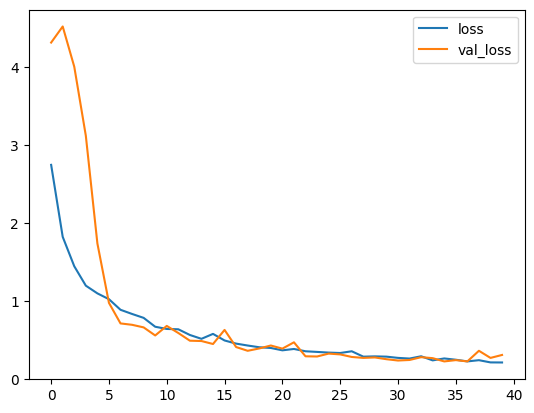

In [21]:
plt.plot(final.history['loss'])
plt.plot(final.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')

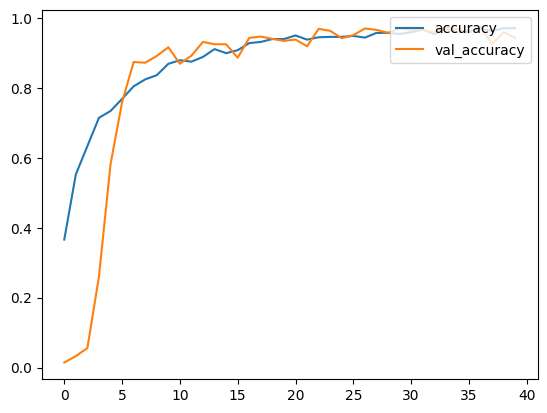

In [22]:
plt.plot(final.history['accuracy'])
plt.plot(final.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')

In [23]:
from tensorflow.keras.models import load_model
import numpy as np

# Loading the model from the uploaded .h5 file
cnn = load_model('TrafficSign.h5')


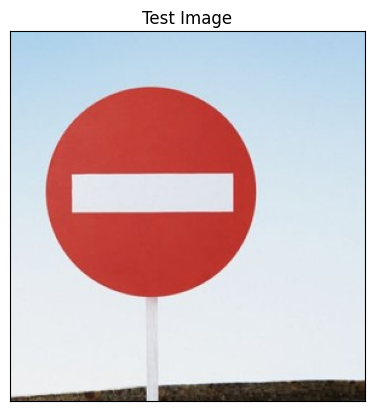

In [24]:
import cv2
image_path = '/content/drive/MyDrive/Traffic Sign/noEntry.jpg'
# Reading an image in default mode
if os.path.isfile(image_path):
    # Proceed with image processing
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
else:
    print(f"The file '{image_path}' does not exist.")
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [25]:
test_image = tf.image.decode_image(tf.io.gfile.GFile(image_path, 'rb').read())

# Resize the image to match the model's input shape
test_image = tf.image.resize(test_image, (224, 224))

# Normalize the image (if required)
test_image = test_image / 255.0  # Assuming the model expects pixel values in [0, 1] range

# Convert the image to a batch of size 1
test_image = tf.expand_dims(test_image, axis=0)


In [26]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 1s 622ms/step


In [27]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

51


In [28]:
print("It's a {}".format(class_names[result_index]))

It's a No entry


# Conclusion

---



The model has achieved an impressive **accuracy rate of approximately 96%** in predicting traffic signs. With this level of performance, the model is now prepared for deployment, which can significantly enhance road safety.

By deploying this model in various applications and systems, we can make substantial contributions to improving road safety. Whether it's in autonomous vehicles, traffic management systems, or even smartphone apps designed to assist drivers, the model's accuracy can play a crucial role in preventing accidents and ensuring that drivers are well-informed about traffic signs and regulations.

This achievement is a significant our efforts to make our roadways safer and more efficient, and it highlights the potential impact of machine learning and AI in enhancing transportation systems.